<a href="https://colab.research.google.com/github/Ruruisagirl/DataScienceProject/blob/main/Data_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dash dash-core-components dash-html-components plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

## TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

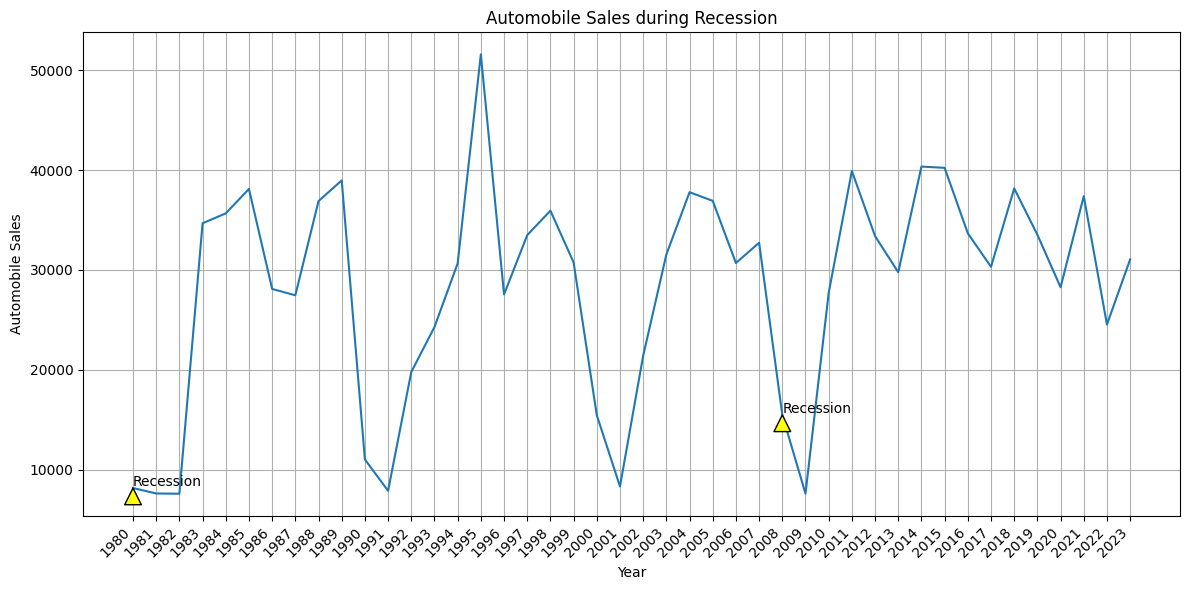

In [ ]:
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='line')
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)

# Set x-axis ticks to all years and rotate them
plt.xticks(yearly_sales.index, rotation=45, ha='right') # Rotate labels and align them to the right

# Annotate recession years (example: 1980 and 2008)
recession_years = df[df['Recession'] == 1]['Year'].unique()
for year in [1980, 2008]:
    if year in recession_years:
        plt.annotate('Recession', xy=(year, yearly_sales[year]), xytext=(year, yearly_sales[year] + 200),
                     arrowprops=dict(facecolor='yellow', shrink=0.05))

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

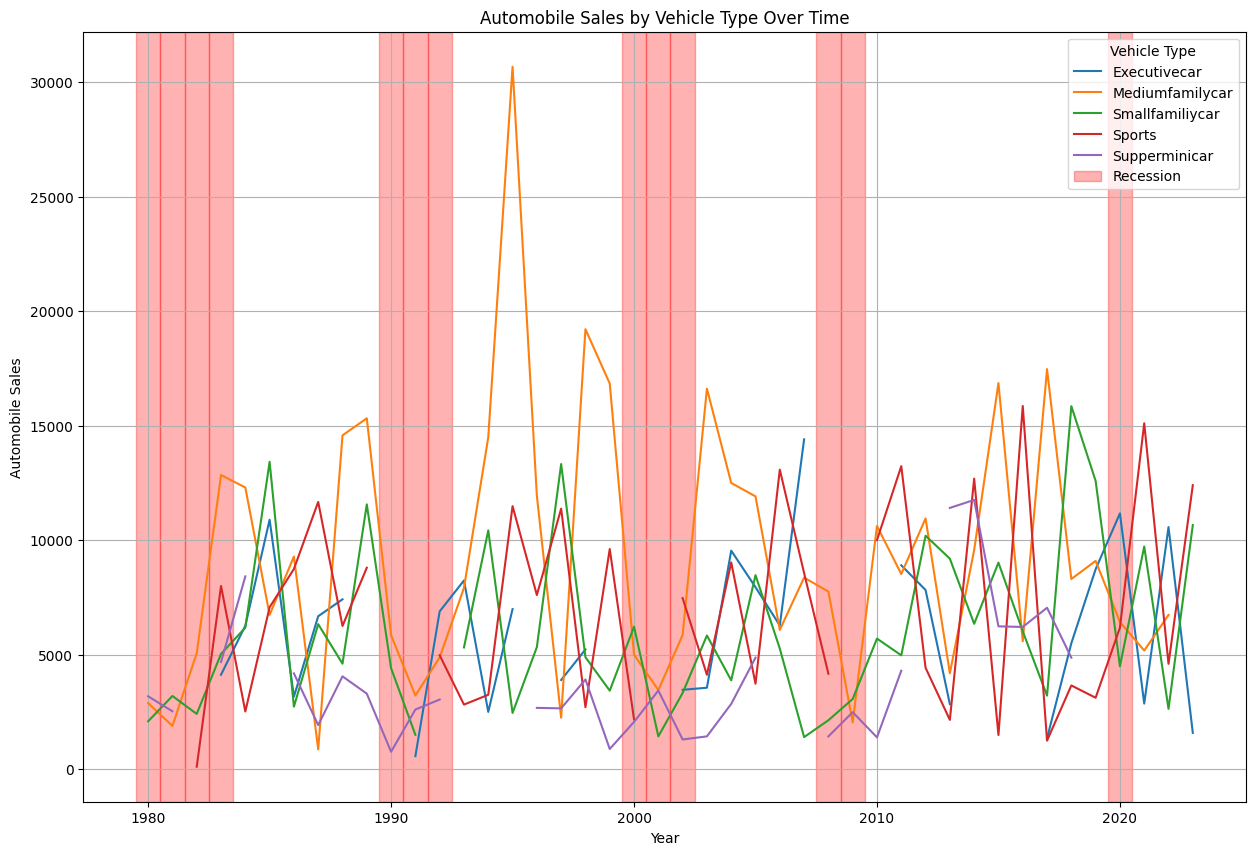

In [ ]:
# Group data by year and vehicle type and calculate the sum of automobile sales
sales_by_type_year = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot the data
plt.figure(figsize=(15, 10))
sales_by_type_year.plot(kind='line', ax=plt.gca())

# Highlight recession areas
recession_years = df[df['Recession'] == 1]['Year'].unique()
for i, year in enumerate(recession_years):
    if i == 0:
        plt.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.3, label='Recession')
    else:
        plt.axvspan(year - 0.5, year + 0.5, color='red', alpha=0.3)

plt.title('Automobile Sales by Vehicle Type Over Time')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.legend(title='Vehicle Type')

plt.show()

## TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period

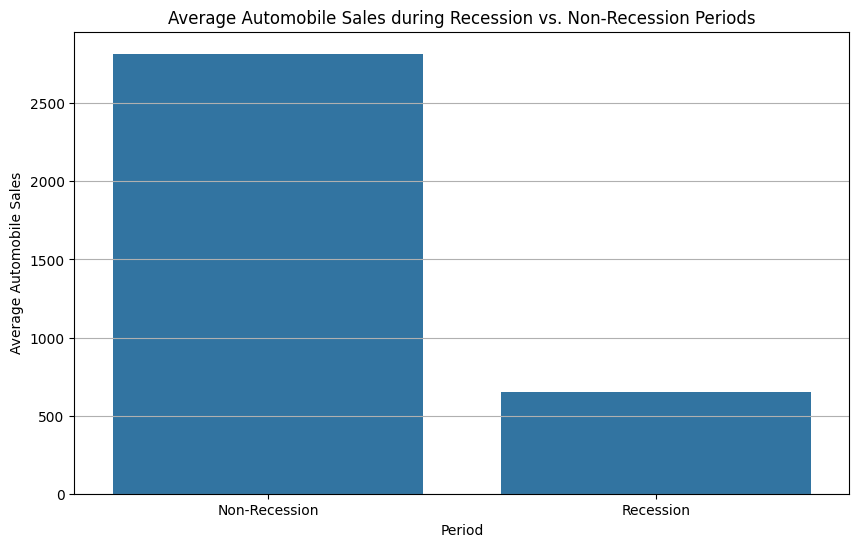

In [ ]:
# Create a new column to indicate recession or non-recession periods
df['Period'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# Calculate the average automobile sales for recession and non-recession periods
average_sales = df.groupby('Period')['Automobile_Sales'].mean().reset_index()

# Use Seaborn to create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Automobile_Sales', data=average_sales)

plt.title('Average Automobile Sales during Recession vs. Non-Recession Periods')
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.grid(axis='y')
plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

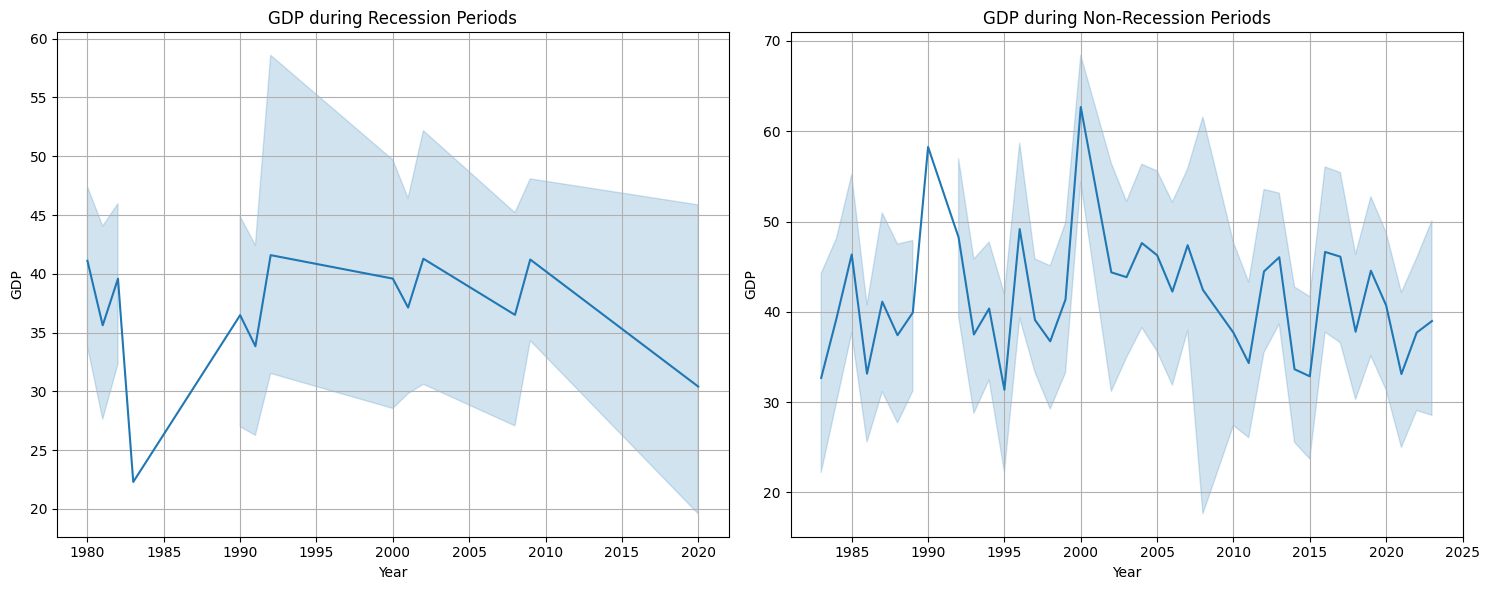

In [ ]:
# Filter data for recession and non-recession periods
recession_df = df[df['Recession'] == 1]
non_recession_df = df[df['Recession'] == 0]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot GDP during recession
sns.lineplot(data=recession_df, x='Year', y='GDP', ax=axes[0])
axes[0].set_title('GDP during Recession Periods')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].grid(True)

# Plot GDP during non-recession
sns.lineplot(data=non_recession_df, x='Year', y='GDP', ax=axes[1])
axes[1].set_title('GDP during Non-Recession Periods')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales

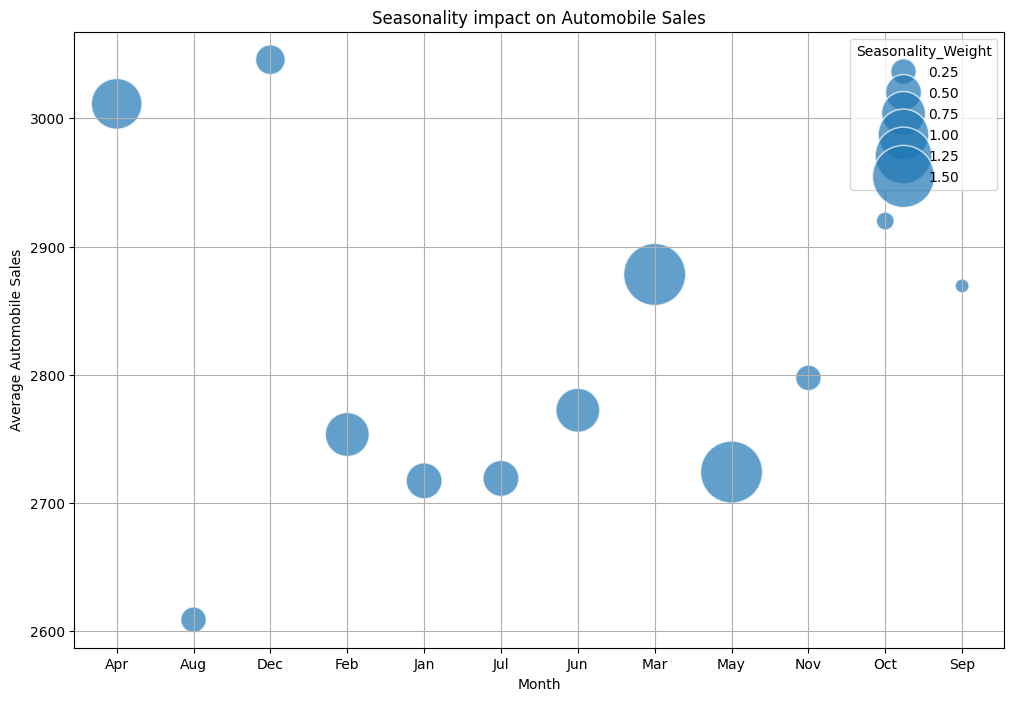

In [ ]:
# Filter data for non-recession periods
non_recession_df = df[df['Recession'] == 0]

# Group by month and calculate average sales and seasonality weight
seasonal_sales = non_recession_df.groupby('Month')[['Automobile_Sales', 'Seasonality_Weight']].mean().reset_index()

# Create a bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=seasonal_sales, x='Month', y='Automobile_Sales', size='Seasonality_Weight', sizes=(100, 2000), alpha=0.7)

plt.title('Seasonality impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Average Automobile Sales')
plt.grid(True)
plt.show()

TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

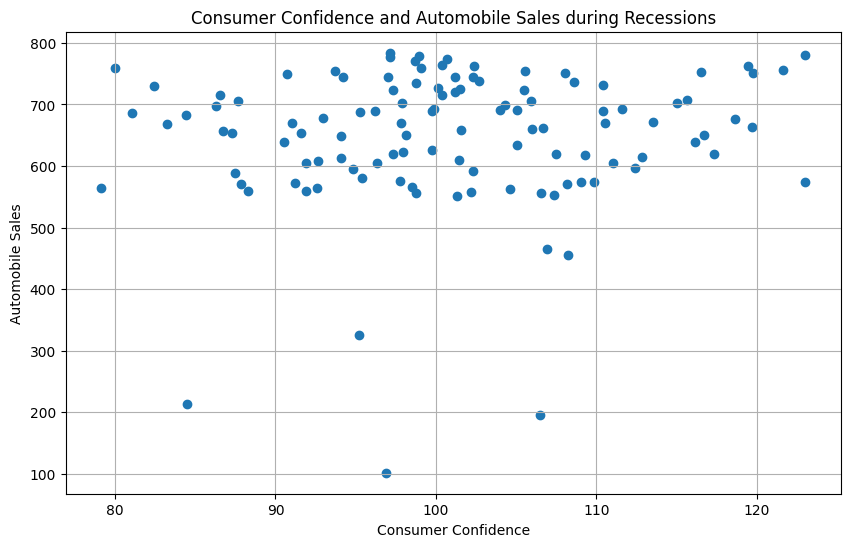

In [ ]:
# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_df['Consumer_Confidence'], recession_df['Automobile_Sales'])

plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

## TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

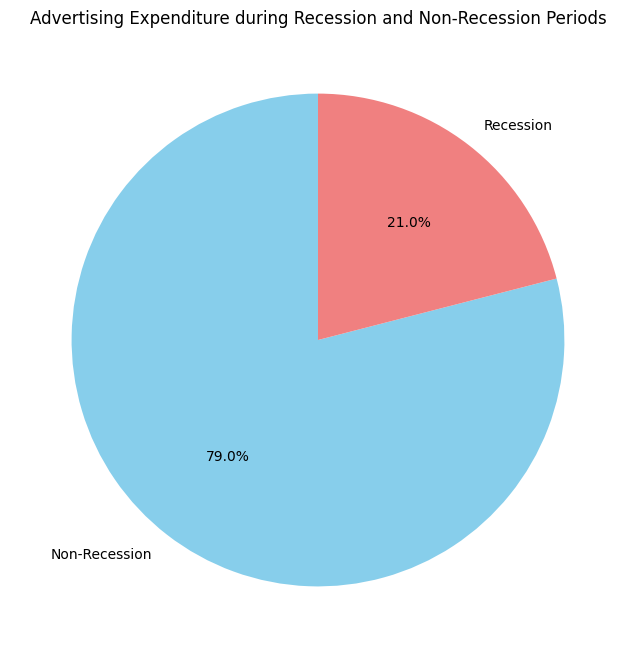

In [ ]:
# Group data by recession period and sum the advertising expenditure
ad_expenditure = df.groupby('Period')['Advertising_Expenditure'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure, labels=ad_expenditure.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

## TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

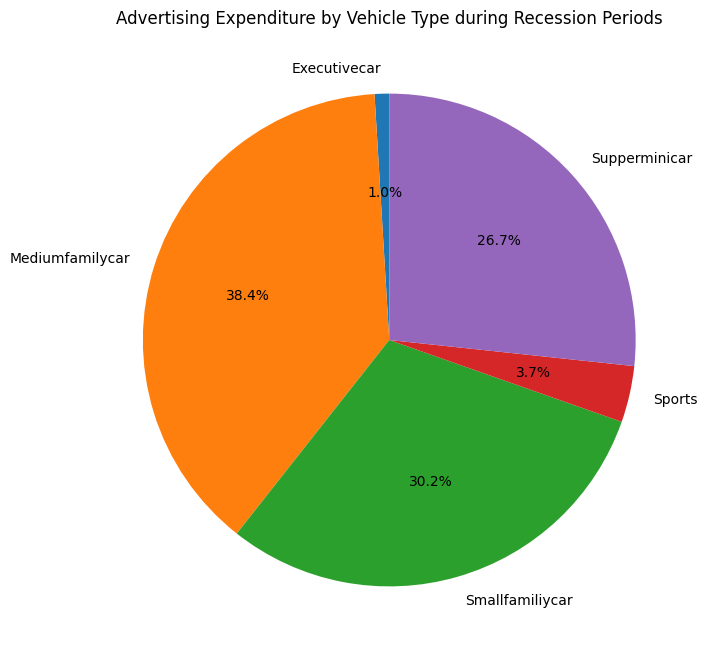

In [ ]:
# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

# Group data by vehicle type and sum the advertising expenditure
ad_expenditure_by_type = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure_by_type, labels=ad_expenditure_by_type.index, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure by Vehicle Type during Recession Periods')
plt.show()

## TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

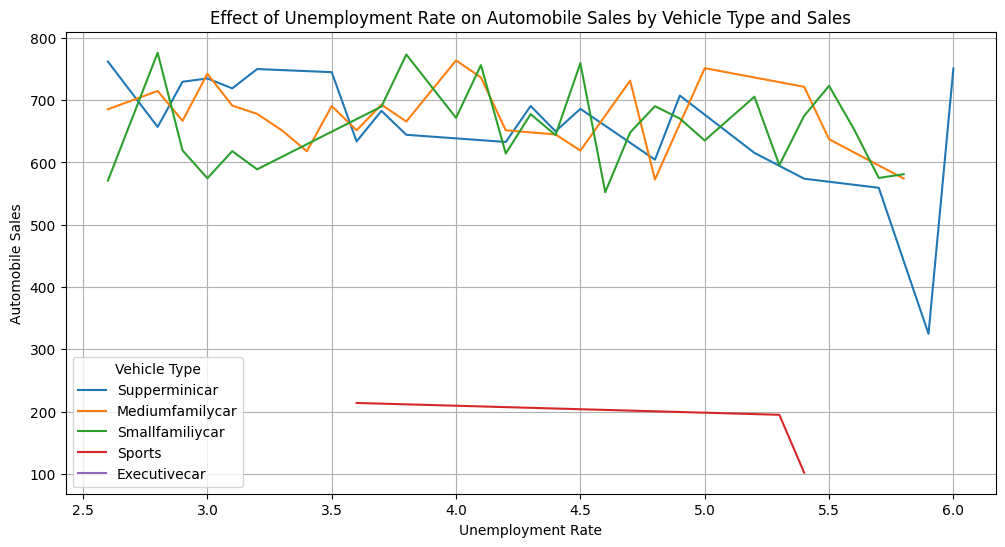

In [4]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
]
# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("Automobile Statistics Dashboard", style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}),#Include style for title
    #TASK 2.2: Add two dropdown menus
    html.Div([
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=dropdown_options, # Use the dropdown_options list
            value='Select Statistics',
            placeholder='Select a report type'
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='Select-year',
            placeholder='Select-year'
        )),
    html.Div([#TASK 2.3: Add a division for output display
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),])
])
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(selected_statistics):
    if selected_statistics =='Yearly Statistics':
        return False
    else:
        return True

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'), Input(component_id='select-year', component_property='value')])


def update_output_container(report_type, selected_year):
    if report_type == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        R_chart1 = dcc.Graph(figure=px.line(yearly_rec, x='Year', y='Automobile_Sales',title="Average Automobile Sales fluctuation over Recession Period"))

#Plot 2 Calculate the average number of vehicles sold by vehicle type

        # use groupby to create relevant data for plotting
        #Hint:Use Vehicle_Type and Automobile_Sales columns
        average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        R_chart2  = dcc.Graph(figure=px.bar(average_sales,x='Vehicle_Type',y='Automobile_Sales',title="Average number of Vehicles Sold During Recession"))

# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # grouping data for plotting
        # Hint:Use Vehicle_Type and Advertising_Expenditure columns
        exp_rec= recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        R_chart3 = dcc.Graph(figure=px.pie(exp_rec,values='Advertising_Expenditure',names='Vehicle_Type',title='Total Advertising Expenditure Share by Vehicles during Recession'))

# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        #grouping data for plotting
        # Hint:Use unemployment_rate,Vehicle_Type and Automobile_Sales columns
        unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        R_chart4 = dcc.Graph(figure=px.bar(unemp_data,x='unemployment_rate',y='Automobile_Sales',labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},title='Effect of Unemployment Rate on Vehicle Type and Sales'))

        return [html.Div(className='chart-item', children=[html.Div(children=R_chart1),html.Div(children=R_chart2)],style={'display': 'flex'}),html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)],style={'display': 'flex'})]

# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots
    # Check for Yearly Statistics.
    elif (selected_year and report_type=='Yearly Statistics'):
        yearly_data = data[data['Year'] == int(selected_year)]


#plot 1 Yearly Automobile sales using line chart for the whole period.
        # grouping data for plotting.
        # Hint:Use the columns Year and Automobile_Sales.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(yas, x= 'Year', y='Automobile_Sales', title='Yearly Average Automobile Sales'))

# Plot 2 Total Monthly Automobile sales using line chart.
        # grouping data for plotting.
        # Hint:Use the columns Month and Automobile_Sales.
        mas=data.groupby('Month')['Automobile_Sales'].sum().reset_index()
        Y_chart2 = dcc.Graph(figure=px.line(mas,x='Month',y='Automobile_Sales',title='Total Monthly Automobile Sales'))

  # Plot bar chart for average number of vehicles sold during the given year
         # grouping data for plotting.
         # Hint:Use the columns Year and Automobile_Sales
        avr_vdata=yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index() # Corrected typo here
        Y_chart3 = dcc.Graph(figure=px.bar(avr_vdata, x='Vehicle_Type', y='Automobile_Sales',title='Average Vehicles Sold by Vehicle Type in the year {}'.format(selected_year))) # Corrected y-axis label and title

    # Total Advertisement Expenditure for each vehicle using pie chart
         # grouping data for plotting.
         # Hint:Use the columns Vehicle_Type and Advertising_Expenditure
        exp_data=yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        Y_chart4 = dcc.Graph(figure=px.pie(exp_data, values='Advertising_Expenditure', names='Vehicle_Type', title='Total Advertising Expenditure Share by Vehicles in {}'.format(selected_year))) # Added year to title

#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
                html.Div(className='chart-item', children=[html.Div(children=Y_chart1),html.Div(children=Y_chart2)],style={'display':'flex'}),
                html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)],style={'display': 'flex'})]

    else:
        return html.Div(html.H4("Please select a valid report type and year."))

# Run the Dash app
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>